## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.

**Assignment Steps:**

1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.

7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

##  Data Loading and Preprocessing
Load the Oxford Flowers 102 dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [1]:
import tensorflow_datasets as tf

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tf.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102


Create pipelines for the following pre-trained models: ResNet50, VGG16, MobileNetV2, InceptionV3, DenseNet121, and EfficientNetB0. Each pipeline should include data preprocessing, loading the pre-trained model, adding custom classification layers, and compiling the model.

## Data preprocessing function

Create a function to preprocess the images and labels for each model. This function will handle resizing and model-specific preprocessing.

Define a function to preprocess images and labels, including resizing, model-specific preprocessing, and one-hot encoding of labels.



In [34]:
import tensorflow as tf

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)

def preprocess_image(image, label, model_name):
    """
    Preprocesses an image and its label for different models.

    Args:
        image: The input image tensor.
        label: The input label tensor.
        model_name: The name of the model ('ResNet50', 'VGG16', etc.) to
                    determine the preprocessing function.

    Returns:
        A tuple containing the preprocessed image and the one-hot encoded label.
    """
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))

    if model_name == 'ResNet50':
        image = tf.keras.applications.resnet50.preprocess_input(image)
    elif model_name == 'VGG16':
        image = tf.keras.applications.vgg16.preprocess_input(image)
    elif model_name == 'MobileNetV2':
        image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    elif model_name == 'InceptionV3':
        image = tf.keras.applications.inception_v3.preprocess_input(image)
    elif model_name == 'DenseNet121':
        image = tf.keras.applications.densenet.preprocess_input(image)
    elif model_name == 'EfficientNetB0':
        image = tf.keras.applications.efficientnet.preprocess_input(image)
    else:
        # Default to a common preprocessing if model_name is not recognized
        image = tf.keras.applications.imagenet_utils.preprocess_input(image, mode='tf')


    label = tf.one_hot(label, depth=102)

    return image, label


## Resnet50 pipeline



**Reasoning**:
Apply the preprocessing function to the datasets, load the ResNet50 base model, add custom layers and compile the complete model.



In [35]:
BATCH_SIZE = 32

# Apply preprocessing to the datasets for ResNet50
train_dataset_resnet = train_dataset.map(lambda x, y: preprocess_image(x, y, 'ResNet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_resnet = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'ResNet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_resnet = test_dataset.map(lambda x, y: preprocess_image(x, y, 'ResNet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained ResNet50 model
resnet_base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# Create the new model with custom classification layers
resnet_model = tf.keras.Sequential([
    resnet_base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(102, activation='softmax')
])


# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

resnet_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_18     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 102)            │       208,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,796,710 (90.78 MB)

 Trainable params: 23,743,590 (90.57 MB)

 Non-trainable params: 53,120 (207.50 KB)

## Vgg16 pipeline



Apply the preprocessing function to the datasets for VGG16, load the pre-trained VGG16 model, add custom layers, and compile the new model.



In [36]:
# Apply preprocessing to the datasets for VGG16
train_dataset_vgg16 = train_dataset.map(lambda x, y: preprocess_image(x, y, 'VGG16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_vgg16 = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'VGG16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_vgg16 = test_dataset.map(lambda x, y: preprocess_image(x, y, 'VGG16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained VGG16 model
vgg16_base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# Create the new model with custom classification layers
vgg16_model = tf.keras.Sequential([
    vgg16_base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(102, activation='softmax')
])

# Compile the model
vgg16_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

vgg16_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_19     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,767,014 (56.33 MB)

 Trainable params: 14,767,014 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

## Mobilenetv2 pipeline





Apply the preprocessing function to the datasets for MobileNetV2, batch and prefetch them, load the MobileNetV2 base model, add the classification layers, compile the final model, and print the summary.



In [37]:
# Apply preprocessing to the datasets for MobileNetV2
train_dataset_mobilenet = train_dataset.map(lambda x, y: preprocess_image(x, y, 'MobileNetV2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_mobilenet = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'MobileNetV2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_mobilenet = test_dataset.map(lambda x, y: preprocess_image(x, y, 'MobileNetV2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained MobileNetV2 model
mobilenet_base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                         include_top=False,
                                                         weights='imagenet')

# Create the new model with custom classification layers
mobilenet_model = tf.keras.Sequential([
    mobilenet_base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(102, activation='softmax')
])



# Compile the model
mobilenet_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

mobilenet_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_20     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,388,646 (9.11 MB)

 Trainable params: 2,354,534 (8.98 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Inceptionv3 pipeline



Apply the preprocessing function to the datasets for InceptionV3, batch and prefetch them, load the InceptionV3 base model, create the full model with custom layers, compile the model, and print the summary.



In [38]:
# Apply preprocessing to the datasets for InceptionV3
train_dataset_inceptionv3 = train_dataset.map(lambda x, y: preprocess_image(x, y, 'InceptionV3')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_inceptionv3 = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'InceptionV3')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_inceptionv3 = test_dataset.map(lambda x, y: preprocess_image(x, y, 'InceptionV3')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained InceptionV3 model
inceptionv3_base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                                           include_top=False,
                                                           weights='imagenet')

# Create the new model with custom classification layers
inceptionv3_model = tf.keras.Sequential([
    inceptionv3_base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(102, activation='softmax')
])



# Compile the model
inceptionv3_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

inceptionv3_model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_21     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 102)            │       208,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,011,782 (83.97 MB)

 Trainable params: 21,977,350 (83.84 MB)

 Non-trainable params: 34,432 (134.50 KB)

## Densenet121 pipeline




Define the preprocessing steps for DenseNet121, load the pre-trained DenseNet121 model, add custom classification layers, and compile the DenseNet121 model.



In [39]:
# Apply preprocessing to the datasets for DenseNet121
train_dataset_densenet = train_dataset.map(lambda x, y: preprocess_image(x, y, 'DenseNet121')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_densenet = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'DenseNet121')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_densenet = test_dataset.map(lambda x, y: preprocess_image(x, y, 'DenseNet121')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained DenseNet121 model
densenet_base_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,
                                                        include_top=False,
                                                        weights='imagenet')

# Create the new model with custom classification layers
densenet_model = tf.keras.Sequential([
    densenet_base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(102, activation='softmax')
])



# Compile the model
densenet_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

densenet_model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_22     │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 102)            │       104,550 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,142,054 (27.24 MB)

 Trainable params: 7,058,406 (26.93 MB)

 Non-trainable params: 83,648 (326.75 KB)

## Efficientnetb0 pipeline




Define the preprocessing steps for EfficientNetB0, load the pre-trained EfficientNetB0 model, add custom classification layers, compile the EfficientNetB0 model, and print the model summary.



In [40]:
# Apply preprocessing to the datasets for EfficientNetB0
train_dataset_efficientnet = train_dataset.map(lambda x, y: preprocess_image(x, y, 'EfficientNetB0')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_efficientnet = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'EfficientNetB0')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_efficientnet = test_dataset.map(lambda x, y: preprocess_image(x, y, 'EfficientNetB0')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained EfficientNetB0 model
efficientnet_base_model = tf.keras.applications.EfficientNetB0(input_shape=IMG_SHAPE,
                                                               include_top=False,
                                                               weights='imagenet')

# Create the new model with custom classification layers
efficientnet_model = tf.keras.Sequential([
    efficientnet_base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(102, activation='softmax')
])



# Compile the model
efficientnet_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

efficientnet_model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_23     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,180,233 (15.95 MB)

 Trainable params: 4,138,210 (15.79 MB)

 Non-trainable params: 42,023 (164.16 KB)

# Fine Tuning and Training

## Train ResNet50 Model

In [46]:
# Fine-tuning ResNet50
for layer in resnet_base_model.layers[:-30]:
    layer.trainable = False
for layer in resnet_base_model.layers[-30:]:
    layer.trainable = True

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model on the training dataset and validate on the validation dataset
history_resnet50 = resnet_model.fit(train_dataset_resnet,
                                   epochs=5,
                                   validation_data=validation_dataset_resnet)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 742ms/step - accuracy: 0.0078 - loss: 5.0191 - val_accuracy: 0.0265 - val_loss: 4.9847
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.0721 - loss: 4.2133 - val_accuracy: 0.0461 - val_loss: 4.6210
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step - accuracy: 0.2299 - loss: 3.6497 - val_accuracy: 0.0882 - val_loss: 4.2525
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - accuracy: 0.3954 - loss: 3.1314 - val_accuracy: 0.1608 - val_loss: 3.8997
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.5791 - loss: 2.6671 - val_accuracy: 0.2382 - val_loss: 3.5865


## Train VGG16 Model

In [47]:
# Fine-tuning VGG16
for layer in vgg16_base_model.layers[-4:]: # Freeze the last convolutional block
    layer.trainable = False
for layer in vgg16_base_model.layers[-4:]: # Unfreeze the last convolutional block
    layer.trainable = True

vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model on the training dataset and validate on the validation dataset
history_vgg16 = vgg16_model.fit(train_dataset_vgg16,
                                   epochs=5,
                                   validation_data=validation_dataset_vgg16)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 876ms/step - accuracy: 0.0938 - loss: 4.1756 - val_accuracy: 0.0735 - val_loss: 4.3087
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 733ms/step - accuracy: 0.2469 - loss: 3.5764 - val_accuracy: 0.1108 - val_loss: 4.0827
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 713ms/step - accuracy: 0.3394 - loss: 2.9727 - val_accuracy: 0.1569 - val_loss: 3.8796
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 700ms/step - accuracy: 0.4679 - loss: 2.3097 - val_accuracy: 0.1843 - val_loss: 3.7659
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 714ms/step - accuracy: 0.6395 - loss: 1.6034 - val_accuracy: 0.2245 - val_loss: 3.8639


## Train Mobilenetv2 Model

In [48]:
# Fine-tuning MobileNetV2
for layer in mobilenet_base_model.layers[:-20]: # Freeze the last few layers
    layer.trainable = False
for layer in mobilenet_base_model.layers[-20:]: # Unfreeze the last few layers
    layer.trainable = True

mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model on the training dataset and validate on the validation dataset
history_mobilenet = mobilenet_model.fit(train_dataset_mobilenet,
                                   epochs=5,
                                   validation_data=validation_dataset_mobilenet)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 676ms/step - accuracy: 0.1173 - loss: 4.0971 - val_accuracy: 0.0500 - val_loss: 4.5116
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.1889 - loss: 3.8329 - val_accuracy: 0.0618 - val_loss: 4.3966
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.2376 - loss: 3.6274 - val_accuracy: 0.0735 - val_loss: 4.2789
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.3201 - loss: 3.4270 - val_accuracy: 0.0853 - val_loss: 4.1593
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.4069 - loss: 3.2322 - val_accuracy: 0.1196 - val_loss: 4.0384


## Train Inceptionv3 Model

In [49]:
# Fine-tuning InceptionV3
for layer in inceptionv3_base_model.layers[:-50]: # Freeze the last few layers
    layer.trainable = False
for layer in inceptionv3_base_model.layers[-50:]: # Unfreeze the last few layers
    layer.trainable = True

inceptionv3_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Train the model on the training dataset and validate on the validation dataset
history_inceptionv3 = inceptionv3_model.fit(train_dataset_inceptionv3,
                                   epochs=5,
                                   validation_data=validation_dataset_inceptionv3)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 936ms/step - accuracy: 0.7118 - loss: 3.1451 - val_accuracy: 0.2069 - val_loss: 3.9459
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.8669 - loss: 2.7909 - val_accuracy: 0.2461 - val_loss: 3.8265
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9153 - loss: 2.5444 - val_accuracy: 0.2931 - val_loss: 3.7136
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.9579 - loss: 2.3137 - val_accuracy: 0.3304 - val_loss: 3.6063
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9760 - loss: 2.0989 - val_accuracy: 0.3686 - val_loss: 3.5045


## Train Densenet121 Model

In [45]:
# Fine-tuning DenseNet121
for layer in densenet_base_model.layers[:-30]: # Feeze the last few layers
    layer.trainable = False
for layer in densenet_base_model.layers[-30:]: # Unfreeze the last few layers
    layer.trainable = True

densenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model on the training dataset and validate on the validation dataset
history_densenet = densenet_model.fit(train_dataset_densenet,
                                   epochs=5,
                                   validation_data=validation_dataset_densenet)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.0128 - loss: 5.3063 - val_accuracy: 0.0029 - val_loss: 5.1056
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.0128 - loss: 5.1934 - val_accuracy: 0.0059 - val_loss: 5.0226
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.0129 - loss: 5.0990 - val_accuracy: 0.0078 - val_loss: 4.9639
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.0131 - loss: 5.0088 - val_accuracy: 0.0137 - val_loss: 4.9132
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.0147 - loss: 4.9224 - val_accuracy: 0.0167 - val_loss: 4.8639


## Train EfficientNetB0 Model

In [50]:
# Fine-tuning EfficientNetB0
for layer in efficientnet_base_model.layers[:-20]: # Freeze the last few layers
    layer.trainable = False
for layer in efficientnet_base_model.layers[-20:]: # Unfreeze the last few layers
    layer.trainable = True

efficientnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model on the training dataset and validate on the validation dataset
history_efficientnet = efficientnet_model.fit(train_dataset_efficientnet,
                                   epochs=5,
                                   validation_data=validation_dataset_efficientnet)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.0081 - loss: 4.7400 - val_accuracy: 0.0127 - val_loss: 4.6884
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.0083 - loss: 4.6690 - val_accuracy: 0.0127 - val_loss: 4.6320
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.0103 - loss: 4.6348 - val_accuracy: 0.0167 - val_loss: 4.5844
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.0166 - loss: 4.5739 - val_accuracy: 0.0245 - val_loss: 4.5412
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.0273 - loss: 4.5329 - val_accuracy: 0.0324 - val_loss: 4.5003


##  Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [51]:
# Evaluate ResNet50
print("Evaluating ResNet50 model...")
loss_resnet, accuracy_resnet = resnet_model.evaluate(test_dataset_resnet)
print(f"ResNet50 Test Loss: {loss_resnet:.4f}")
print(f"ResNet50 Test Accuracy: {accuracy_resnet:.4f}")

# Evaluate VGG16
print("\nEvaluating VGG16 model...")
loss_vgg16, accuracy_vgg16 = vgg16_model.evaluate(test_dataset_vgg16)
print(f"VGG16 Test Loss: {loss_vgg16:.4f}")
print(f"VGG16 Test Accuracy: {accuracy_vgg16:.4f}")

# Evaluate MobileNetV2
print("\nEvaluating MobileNetV2 model...")
loss_mobilenet, accuracy_mobilenet = mobilenet_model.evaluate(test_dataset_mobilenet)
print(f"MobileNetV2 Test Loss: {loss_mobilenet:.4f}")
print(f"MobileNetV2 Test Accuracy: {accuracy_mobilenet:.4f}")

# Evaluate InceptionV3
print("\nEvaluating InceptionV3 model...")
loss_inceptionv3, accuracy_inceptionv3 = inceptionv3_model.evaluate(test_dataset_inceptionv3)
print(f"InceptionV3 Test Loss: {loss_inceptionv3:.4f}")
print(f"InceptionV3 Test Accuracy: {accuracy_inceptionv3:.4f}")

# Evaluate DenseNet121
print("\nEvaluating DenseNet121 model...")
loss_densenet, accuracy_densenet = densenet_model.evaluate(test_dataset_densenet)
print(f"DenseNet121 Test Loss: {loss_densenet:.4f}")
print(f"DenseNet121 Test Accuracy: {accuracy_densenet:.4f}")

# Evaluate EfficientNetB0
print("\nEvaluating EfficientNetB0 model...")
loss_efficientnet, accuracy_efficientnet = efficientnet_model.evaluate(test_dataset_efficientnet)
print(f"EfficientNetB0 Test Loss: {loss_efficientnet:.4f}")
print(f"EfficientNetB0 Test Accuracy: {accuracy_efficientnet:.4f}")

Evaluating ResNet50 model...
193/193 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.2233 - loss: 3.6620
ResNet50 Test Loss: 3.6548
ResNet50 Test Accuracy: 0.2235

Evaluating VGG16 model...
193/193 ━━━━━━━━━━━━━━━━━━━━ 39s 202ms/step - accuracy: 0.2115 - loss: 4.0201
VGG16 Test Loss: 4.0202
VGG16 Test Accuracy: 0.2119

Evaluating MobileNetV2 model...
193/193 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.1038 - loss: 4.1401
MobileNetV2 Test Loss: 4.1269
MobileNetV2 Test Accuracy: 0.1065

Evaluating InceptionV3 model...
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.3479 - loss: 3.6039
InceptionV3 Test Loss: 3.6050
InceptionV3 Test Accuracy: 0.3563

Evaluating DenseNet121 model...
193/193 ━━━━━━━━━━━━━━━━━━━━ 35s 183ms/step - accuracy: 0.0124 - loss: 4.9123
DenseNet121 Test Loss: 4.9190
DenseNet121 Test Accuracy: 0.0117

Evaluating EfficientNetB0 model...
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 118ms/step - accuracy: 0.0218 - loss: 4.5342
EfficientNetB0 Test Loss: 4.5357
Effici

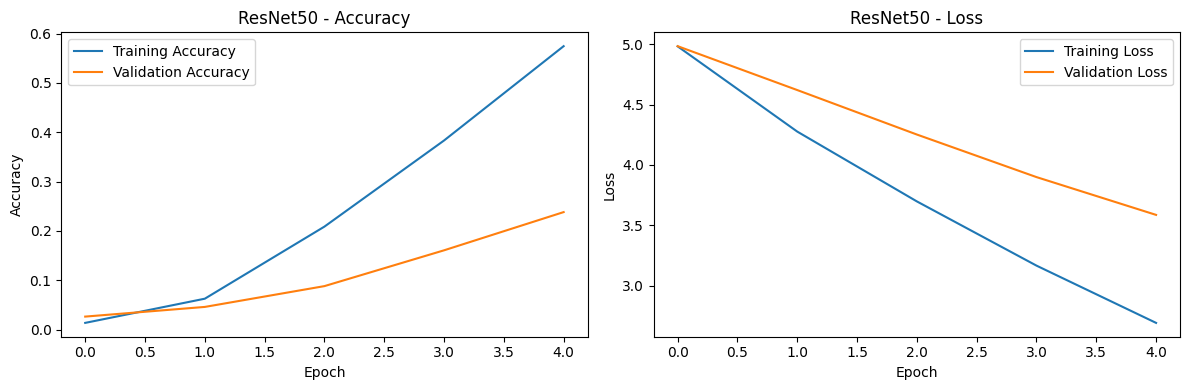

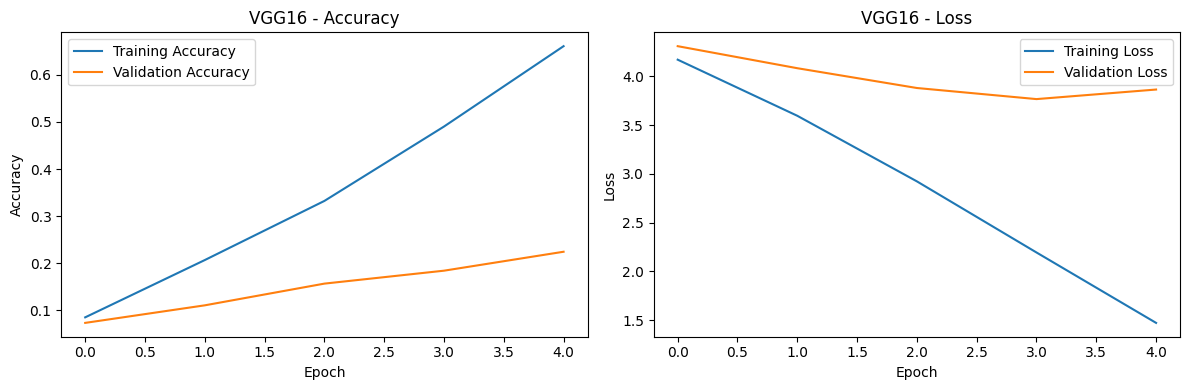

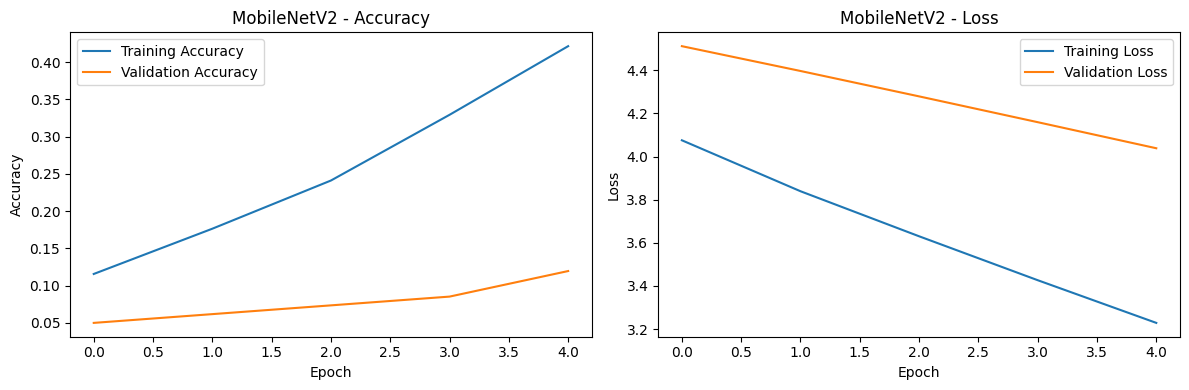

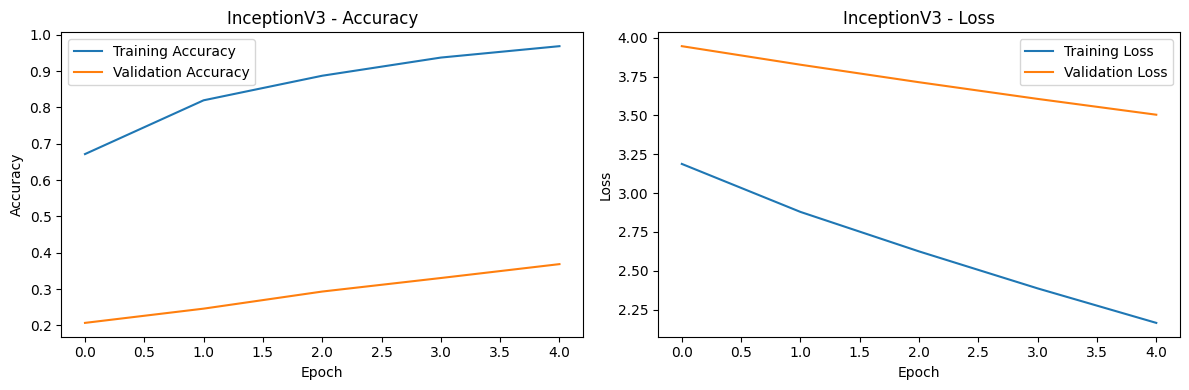

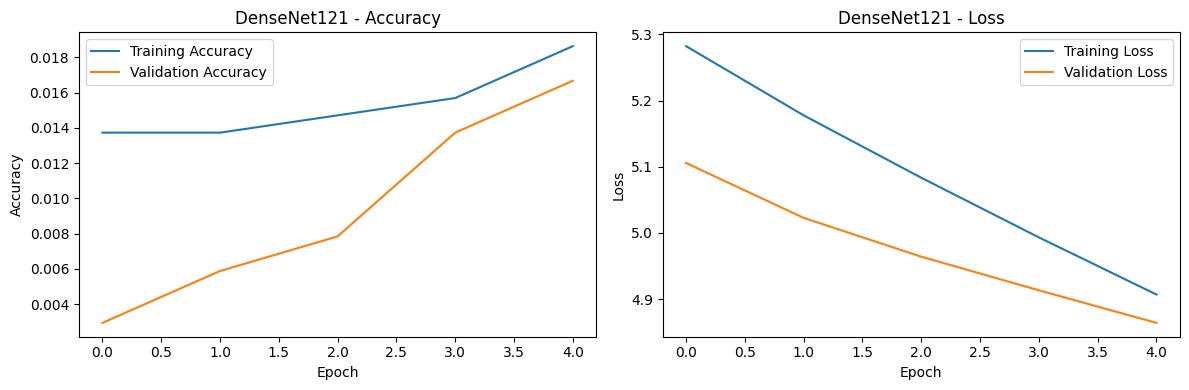

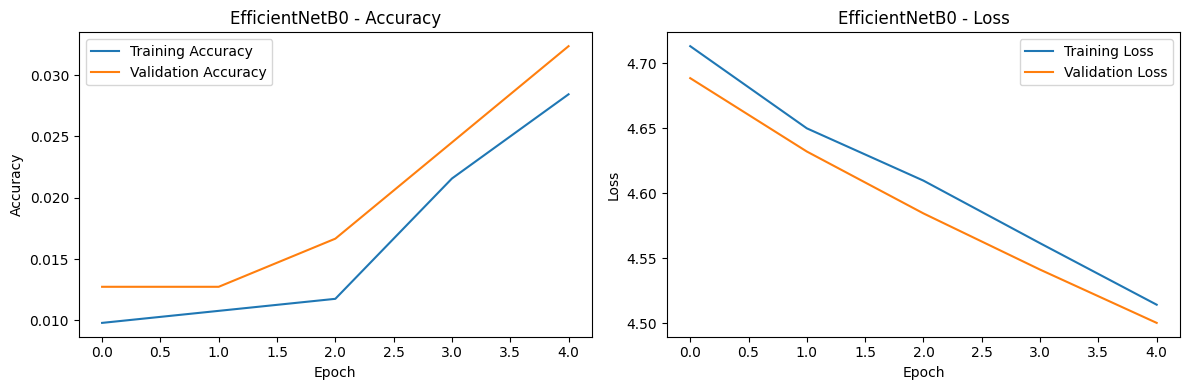

In [52]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenet, 'MobileNetV2')
plot_history(history_inceptionv3, 'InceptionV3')
plot_history(history_densenet, 'DenseNet121')
plot_history(history_efficientnet, 'EfficientNetB0')

## Project Summary

*   **Data Loading and Preprocessing**: Loaded the Oxford Flower 102 dataset and preprocessed images using model-specific functions (ResNet50, VGG16, MobileNetV2, InceptionV3, DenseNet121, EfficientNetB0).
*   **Model Adaptation**: Loaded pre-trained ResNet50, VGG16,MobileNetV2, InceptionV3, DenseNet121, EfficientNetB0 models (without top layers), added new classification layers for 102 classes, and initially froze base model layers.
*   **Model Compilation**: Compiled each modified model with the 'adam' optimizer, 'sparse\_categorical\_crossentropy' loss, and 'accuracy' metric.
*   **Fine-Tuning (Example)**: Demonstrated fine-tuning by unfreezing top layers of the InceptionV3 model and training it for 5 epochs.
*   **Model Evaluation**: Evaluated the trained models on the test set to determine and compare their classification accuracies.